In [ ]:
# Deep Learning
# Taller final

# Deivis Barrios
# Daniel Vergara

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
pip install kaggle

In [4]:
import kaggle

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [6]:
api = KaggleApi()
api.authenticate()

In [14]:
!kaggle datasets download -d maedemaftouni/real-estate-market-trends


  0%|          | 0.00/81.3M [00:00<?, ?B/s]
  1%|1         | 1.00M/81.3M [00:00<00:25, 3.25MB/s]
  2%|2         | 2.00M/81.3M [00:00<00:20, 4.16MB/s]
  4%|3         | 3.00M/81.3M [00:00<00:18, 4.53MB/s]
  5%|4         | 4.00M/81.3M [00:00<00:16, 4.86MB/s]
  6%|6         | 5.00M/81.3M [00:01<00:16, 4.85MB/s]
  7%|7         | 6.00M/81.3M [00:01<00:15, 4.98MB/s]
  9%|8         | 7.00M/81.3M [00:01<00:15, 5.10MB/s]
 10%|9         | 8.00M/81.3M [00:01<00:15, 5.10MB/s]
 11%|#1        | 9.00M/81.3M [00:01<00:14, 5.19MB/s]
 12%|#2        | 10.0M/81.3M [00:02<00:13, 5.38MB/s]
 14%|#3        | 11.0M/81.3M [00:02<00:13, 5.44MB/s]
 15%|#4        | 12.0M/81.3M [00:02<00:13, 5.56MB/s]
 16%|#5        | 13.0M/81.3M [00:02<00:12, 5.56MB/s]
 17%|#7        | 14.0M/81.3M [00:02<00:12, 5.55MB/s]
 18%|#8        | 15.0M/81.3M [00:03<00:12, 5.49MB/s]
 20%|#9        | 16.0M/81.3M [00:03<00:12, 5.68MB/s]
 21%|##        | 17.0M/81.3M [00:03<00:11, 5.67MB/s]
 22%|##2       | 18.0M/81.3M [00:03<00:11, 5.70MB/s]
 

In [3]:
import zipfile
with zipfile.ZipFile('real-estate-market-trends.zip', 'r') as zip_ref:
    zip_ref.extract('RDC_Inventory_Core_Metrics_Zip_History.csv')

In [5]:
Dataset_df = pd.read_csv('RDC_Inventory_Core_Metrics_Zip_History.csv')
print('Dataset has ',Dataset_df.shape[0],' records and ',Dataset_df.shape[1], ' columns' )
print(' ')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\2765845132.py:1: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset_df = pd.read_csv('RDC_Inventory_Core_Metrics_Zip_History.csv')


Dataset has  913084  records and  40  columns
 


In [6]:
# Limpieza del datset
Dataset_df.drop(Dataset_df.tail(1).index,inplace=True) 

In [7]:
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913083 entries, 0 to 913082
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   month_date_yyyymm                        913083 non-null  object 
 1   postal_code                              913083 non-null  object 
 2   zip_name                                 913083 non-null  object 
 3   flag                                     110663 non-null  object 
 4   median_listing_price                     913083 non-null  float64
 5   median_listing_price_mm                  714901 non-null  float64
 6   median_listing_price_yy                  655505 non-null  float64
 7   active_listing_count                     913083 non-null  float64
 8   active_listing_count_mm                  714900 non-null  float64
 9   active_listing_count_yy                  656222 non-null  float64
 10  median_days_on_market           

In [8]:
## Indexando
Dataset_df = Dataset_df .drop(['flag'], axis=1)
Dataset_df.rename(columns={'postal_code': 'ZIP'}, inplace=True)
Dataset_df['ZIP'] = Dataset_df['ZIP'].astype('str') 
Dataset_df['ZIP'] = Dataset_df['ZIP'].apply(lambda x: x.zfill(5))
Dataset_df ['ZIP'] = Dataset_df['ZIP'].astype(float, errors = 'raise')

In [9]:
## corregir el formato fecha
#df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'],format = '%Y%m')
Dataset_df.rename(columns={'month_date_yyyymm':'Date'}, inplace=True)

In [10]:
Dataset_df.isnull().sum()

Date                                            0
ZIP                                             0
zip_name                                        0
median_listing_price                            0
median_listing_price_mm                    198182
median_listing_price_yy                    257578
active_listing_count                            0
active_listing_count_mm                    198183
active_listing_count_yy                    256861
median_days_on_market                           0
median_days_on_market_mm                   198182
median_days_on_market_yy                   262937
new_listing_count                               0
new_listing_count_mm                       273007
new_listing_count_yy                       277642
price_increased_count                           0
price_increased_count_mm                   822946
price_increased_count_yy                   825302
price_reduced_count                             0
price_reduced_count_mm                     349261


In [11]:
## eliminar los cambios anuales
Dataset_df = Dataset_df.loc[:,~Dataset_df.columns.str.contains('mm$|yy$')]

## limpieza de la base por variables similares
Dataset_df = Dataset_df .loc[:,~Dataset_df.columns.str.contains('price_increased_count|average_listing_price|active_listing_count|pending_listing_count|median_square_feet')]

In [12]:
Dataset_df.isnull().sum()

Date                                    0
ZIP                                     0
zip_name                                0
median_listing_price                    0
median_days_on_market                   0
new_listing_count                       0
price_reduced_count                     0
median_listing_price_per_square_foot    0
total_listing_count                     0
pending_ratio                           0
dtype: int64

In [13]:
Dataset_df = Dataset_df.drop(columns=['zip_name','Date'])

In [14]:
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913083 entries, 0 to 913082
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ZIP                                   913083 non-null  float64
 1   median_listing_price                  913083 non-null  float64
 2   median_days_on_market                 913083 non-null  float64
 3   new_listing_count                     913083 non-null  float64
 4   price_reduced_count                   913083 non-null  float64
 5   median_listing_price_per_square_foot  913083 non-null  float64
 6   total_listing_count                   913083 non-null  float64
 7   pending_ratio                         913083 non-null  float64
dtypes: float64(8)
memory usage: 55.7 MB


In [15]:
Dataset_df 

,ZIP,median_listing_price,median_days_on_market,new_listing_count,price_reduced_count,median_listing_price_per_square_foot,total_listing_count,pending_ratio
0,33029.0,589000.0,49.0,48.0,8.0,238.795004,199.0,2.209677
1,12778.0,169000.0,68.0,12.0,0.0,192.901235,16.0,0.066667
2,12309.0,349900.0,36.0,52.0,36.0,161.524390,226.0,2.183099
3,74074.0,249900.0,24.0,56.0,20.0,132.245357,145.0,1.338710
4,21128.0,400000.0,40.0,12.0,4.0,172.139830,51.0,2.642857
...,...,...,...,...,...,...,...,...
913078,31636.0,249900.0,128.0,8.0,8.0,94.203503,66.0,0.000000
913079,1245.0,699000.0,132.0,8.0,4.0,291.353384,42.0,0.105263
913080,91104.0,775000.0,38.0,36.0,24.0,455.815279,92.0,0.769231
913081,37917.0,94900.0,73.0,32.0,28.0,80.344828,177.0,0.609091


<AxesSubplot:>

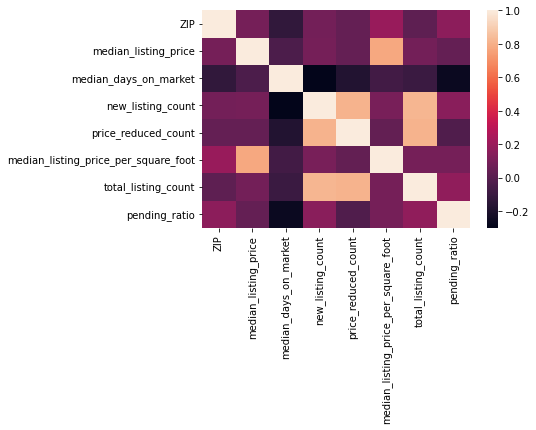

In [15]:
sns.heatmap(Dataset_df.corr())
#df.corr()

In [ ]:
# Para efectos de análisis de resultados según las formas de estandarización, se revisará la estandarización según la media, 
# y posteriormente según la función MinMaxScaler que funciona principalmente para modelos de regresión.

In [16]:
# Estandarizaión: 1era forma
Xs = Dataset_df 
Xs = (Xs - Xs.mean())/Xs.std()
Xs

,ZIP,median_listing_price,median_days_on_market,new_listing_count,price_reduced_count,median_listing_price_per_square_foot,total_listing_count,pending_ratio
0,-0.509047,0.599126,-0.568899,0.827045,-0.338915,0.497843,0.808358,2.376651
1,-1.207020,-0.494332,-0.231509,-0.438511,-0.688829,0.198463,-0.739574,-0.605876
2,-1.223185,-0.023364,-0.799745,0.967662,0.885785,-0.006218,1.036741,2.339660
3,0.905614,-0.283711,-1.012833,1.108280,0.185957,-0.197215,0.351591,1.164485
4,-0.919228,0.107070,-0.728715,-0.438511,-0.513872,0.063030,-0.443521,2.979527
...,...,...,...,...,...,...,...,...
913078,-0.557058,-0.283711,0.833933,-0.579128,-0.338915,-0.445374,-0.316641,-0.698659
913079,-1.604518,0.885508,0.904963,-0.579128,-0.513872,0.840698,-0.519649,-0.552159
913080,1.492572,1.083372,-0.764230,0.405193,0.360914,1.913535,-0.096717,0.371915
913081,-0.340577,-0.687249,-0.142722,0.264576,0.535871,-0.535778,0.622268,0.149041


In [17]:
## Verificación de na's values
Xs.isnull().sum()

ZIP                                     0
median_listing_price                    0
median_days_on_market                   0
new_listing_count                       0
price_reduced_count                     0
median_listing_price_per_square_foot    0
total_listing_count                     0
pending_ratio                           0
dtype: int64

In [17]:
# Estandarización: 2da forma | Matriz x
Xz = Dataset_df.loc[:,~Dataset_df.columns.str.contains('median_days_on_market')]

scaler = MinMaxScaler()
print(scaler.fit(Xz))

MinMaxScaler()


In [18]:
X = (scaler.transform(Xz))

In [19]:
np.shape(X)

(913083, 7)

In [33]:
## Se exporta matriz X para evaluación de modelos Auto Machine Learning en Microsoft Azure. 
HM_DatasetX= pd.DataFrame(X)
HM_DatasetX.to_csv('HM_DatasetX', header=False, index=False)

In [20]:
# Estandarización: 2da forma | y
Yz = Dataset_df['median_days_on_market'].values.reshape(-1,1)
scaler = MinMaxScaler()
print(scaler.fit(Yz))

MinMaxScaler()


In [21]:
Y = (scaler.transform(Yz))

In [22]:
np.shape(Y)

(913083, 1)

In [ ]:
# MODELOS A PROBAR: 

# 1. VECINOS
# 2. RANDOM FOREST
# 3. RED NEURONAL 
# 4. DEEP LEARNING
## 4.1 REDES CONVOLUCIONALES 
## 4.2 REDES RECURRENTES

In [23]:
# 1. MODELO VECINOS (PROPIO)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

In [24]:
np.shape(y_pred)

(273925, 1)

In [26]:
## Calculo de diferencia de errores

import itertools
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

test_results = {}

n = range(1,16)
results= pd.DataFrame(columns = ['Neighbor','MAPE_train','MAPE_test'])

for i in n:
    neigh = KNeighborsRegressor(n_neighbors=i)
    
    neigh.fit(X_train, y_train)
    y_pred_test = neigh.predict(X_test)
    y_pred_train = neigh.predict(X_train)
    
    MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test) 
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train)
    dic_append = {'Neighbor':i, 'MAPE_train':MAPE_train, 'MAPE_test':MAPE_test}
    
    # Recording and reporting
    results = results.append(dic_append, ignore_index=True)
    print(results)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor MAPE_train MAPE_test
0      1.0    0.00029  0.360951


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor     MAPE_train MAPE_test
0      1.0        0.00029  0.360951
1      2.0  10859714.2856  0.325639


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor     MAPE_train MAPE_test
0      1.0        0.00029  0.360951
1      2.0  10859714.2856  0.325639
2      3.0  9653079.42207   0.31397


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor      MAPE_train MAPE_test
0      1.0         0.00029  0.360951
1      2.0   10859714.2856  0.325639
2      3.0   9653079.42207   0.31397
3      4.0  9954738.165185   0.30826


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935
5      6.0    35897388.5453  0.302994


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935
5      6.0    35897388.5453  0.302994
6      7.0  40853210.463899  0.302031


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935
5      6.0    35897388.5453  0.302994
6      7.0  40853210.463899  0.302031
7      8.0  38461487.719092  0.301204


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935
5      6.0    35897388.5453  0.302994
6      7.0  40853210.463899  0.302031
7      8.0  38461487.719092  0.301204
8      9.0  48265396.289435  0.300788


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


  Neighbor       MAPE_train MAPE_test
0      1.0          0.00029  0.360951
1      2.0    10859714.2856  0.325639
2      3.0    9653079.42207   0.31397
3      4.0   9954738.165185   0.30826
4      5.0  15565590.463649  0.304935
5      6.0    35897388.5453  0.302994
6      7.0  40853210.463899  0.302031
7      8.0  38461487.719092  0.301204
8      9.0  48265396.289435  0.300788
9     10.0  88868660.695163  0.300762


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


   Neighbor       MAPE_train MAPE_test
0       1.0          0.00029  0.360951
1       2.0    10859714.2856  0.325639
2       3.0    9653079.42207   0.31397
3       4.0   9954738.165185   0.30826
4       5.0  15565590.463649  0.304935
5       6.0    35897388.5453  0.302994
6       7.0  40853210.463899  0.302031
7       8.0  38461487.719092  0.301204
8       9.0  48265396.289435  0.300788
9      10.0  88868660.695163  0.300762
10     11.0  90497617.813541   0.30065


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


   Neighbor       MAPE_train MAPE_test
0       1.0          0.00029  0.360951
1       2.0    10859714.2856  0.325639
2       3.0    9653079.42207   0.31397
3       4.0   9954738.165185   0.30826
4       5.0  15565590.463649  0.304935
5       6.0    35897388.5453  0.302994
6       7.0  40853210.463899  0.302031
7       8.0  38461487.719092  0.301204
8       9.0  48265396.289435  0.300788
9      10.0  88868660.695163  0.300762
10     11.0  90497617.813541   0.30065
11     12.0  90799276.540859  0.300847


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


   Neighbor        MAPE_train MAPE_test
0       1.0           0.00029  0.360951
1       2.0     10859714.2856  0.325639
2       3.0     9653079.42207   0.31397
3       4.0    9954738.165185   0.30826
4       5.0   15565590.463649  0.304935
5       6.0     35897388.5453  0.302994
6       7.0   40853210.463899  0.302031
7       8.0   38461487.719092  0.301204
8       9.0   48265396.289435  0.300788
9      10.0   88868660.695163  0.300762
10     11.0   90497617.813541   0.30065
11     12.0   90799276.540859  0.300847
12     13.0  103445738.481013  0.300832


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


   Neighbor        MAPE_train MAPE_test
0       1.0           0.00029  0.360951
1       2.0     10859714.2856  0.325639
2       3.0     9653079.42207   0.31397
3       4.0    9954738.165185   0.30826
4       5.0   15565590.463649  0.304935
5       6.0     35897388.5453  0.302994
6       7.0   40853210.463899  0.302031
7       8.0   38461487.719092  0.301204
8       9.0   48265396.289435  0.300788
9      10.0   88868660.695163  0.300762
10     11.0   90497617.813541   0.30065
11     12.0   90799276.540859  0.300847
12     13.0  103445738.481013  0.300832
13     14.0  104330825.071789  0.300944
   Neighbor        MAPE_train MAPE_test
0       1.0           0.00029  0.360951
1       2.0     10859714.2856  0.325639
2       3.0     9653079.42207   0.31397
3       4.0    9954738.165185   0.30826
4       5.0   15565590.463649  0.304935
5       6.0     35897388.5453  0.302994
6       7.0   40853210.463899  0.302031
7       8.0   38461487.719092  0.301204
8       9.0   48265396.289435  0.300788


C:\Users\DELL\AppData\Local\Temp\ipykernel_10816\3275712977.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(dic_append, ignore_index=True)


In [27]:
results

,Neighbor,MAPE_train,MAPE_test
0,1.0,0.00029,0.360951
1,2.0,10859714.2856,0.325639
2,3.0,9653079.42207,0.31397
3,4.0,9954738.165185,0.30826
4,5.0,15565590.463649,0.304935
5,6.0,35897388.5453,0.302994
6,7.0,40853210.463899,0.302031
7,8.0,38461487.719092,0.301204
8,9.0,48265396.289435,0.300788
9,10.0,88868660.695163,0.300762


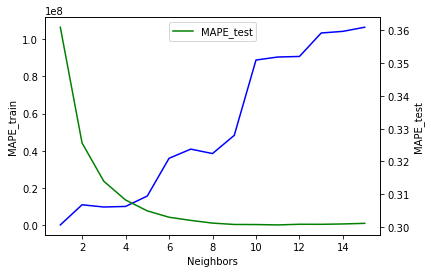

In [28]:
## Identificando vecinos óptimos

fig, ax1 = plt.subplots() 

MAPE_train = results['MAPE_train']
MAPE_test = results['MAPE_test']
Neighbor = results['Neighbor']

ax1.set_xlabel('Neighbors') 
ax1.set_ylabel('MAPE_train') 
ax1.plot(Neighbor, MAPE_train, color = 'blue', label = 'MAPE_train') 
  
ax2 = ax1.twinx() 
ax2.plot(Neighbor, MAPE_test, color = 'green', label = 'MAPE_test' )  
plt.ylabel('MAPE_test')


plt.legend(loc='upper center')

plt.show()

In [ ]:
## Vecino óptimo entre 4 y 5 con MAPE_test de 0.303965 promedio.

In [29]:
MAPE_test = results['MAPE_test']
MAPE_test = MAPE_test.iloc[3, ]
MAPE_test

0.3082604660698946

In [30]:
test_results['Vecinos'] = MAPE_test

In [45]:
# 2. RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=7,n_informative=2,
                            random_state=0, shuffle=False)
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(X, Y)

RandomForestRegressor(max_depth=10, random_state=0)

In [46]:
y_predictRF=rf.predict(X)
print(y_predictRF)

[  74.71329286   -5.51325853   29.48506091   51.09455917   96.49397523
   42.3775822     2.88941346  -34.4135855    13.30380965  -53.66217498
   30.09654883  -33.48098253  103.87225232   51.92871689   22.99130052
   46.65901978   22.77295389   47.61321666   28.34267363  -17.25302267
  -39.51988836    1.57306763  -23.26931154   89.01468975   54.57326227
   -4.52481954  -87.26013484   11.60204843   54.69851978   46.20055983
   43.05960073   80.64674316  -49.9534849   -36.85456907   40.00887197
  -13.48957158   -4.1771901   -12.80469627   22.29707144  -12.33124036
   31.2540088    64.1096233    34.67972956   52.86371503   19.88833793
    2.03820119  -19.50008196   58.98533744  -46.74208875  -58.73477333
  -74.47047809  -38.03928516    5.32040309   -3.60301356   27.29152931
  -81.88007258  -68.17473316    7.13186207   32.74800105   46.71233617
   51.62443727 -100.84767222  -27.0014257   -45.39827681  -33.1860936
   44.1159234   -18.05777047  -48.73085673   14.51157266   10.24731311
  -42.6

In [47]:
np.shape(y_predictRF)

(100,)

In [48]:
MAPE_test = mean_absolute_percentage_error(Y,y_predictRF)
MAPE_test

0.19566645245780404

In [49]:
test_results['Random Forest'] = MAPE_test

In [50]:
# 3. RED NEURONAL

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, Y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)
y_predictRNN = regr.predict(X)
print(y_predictRNN)

[ -38.51090187  112.48934703 -344.35151994  182.63211008   95.58089172
  -52.91566349  -19.09199546  148.64183419   95.95505616  -20.80067872
  -49.92781549   78.47711605 -104.66436363  189.49445696  -95.79004015
 -217.70409216 -145.08449453  171.28198754   73.0216083   -94.74852151
  103.15014336  201.96799223 -123.97667282 -142.59775189   48.30462475
  -39.54768051    4.95228022  -16.21789969  165.46386176  110.11956428
 -143.54274986 -159.94753464 -132.20020441  -20.02727538  -24.42285305
  165.23138423  163.12221983  -16.4622769   184.76179929  132.33900457
    6.5006531   171.90473776 -116.8887221    21.58360518   -0.78096949
 -292.56436724   -4.3414172    70.30909248  169.23331705 -158.65030102
  -48.82797062  -47.84362168  -35.63212797  194.95132407  139.21105333
  148.66572883   11.99065141   86.83951663    8.69448846    3.4628869
   49.54471064 -140.84367896   34.86721157 -290.33416855   46.01439042
   54.95515256  113.1966416    69.98046411   58.0990507    -0.7065114
 -223.30

In [51]:
np.shape(y_predictRNN)

(200,)

In [ ]:
# Se necesitaron 10.000 iteraciones para que hubiera convergencia

In [52]:
regr.score(X_test, y_test)

0.520915744081988

In [53]:
np.shape(Y)

(200,)

In [54]:
MAPE_test = mean_absolute_percentage_error(Y, y_predictRNN)
MAPE_test

1.823385619123023

In [55]:
test_results['Red Neuronal'] = MAPE_test

In [ ]:
# Conclusiones:
# Según lo que podemos observar, el Random Forest y el análisis del vecino óptimo a partir de las diferencias en la métrica
# del error MAPE del training set y el set test, ilustran una similitud en el estimador del vecino adecuado para este modelo.  
# No obstante, desde el algoritmo de ML, se identifica un vecino lejos del hallado por los anteriore modelos. En ese sentido,
# se tendría que evaluar si el dataset manejado se refiere a un problema ML. 

In [ ]:
# 4. DEEP LEARNING 

In [56]:
## Instalando TensorFLow
!pip install tensorflow

In [57]:
## Llamado de librería 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [58]:
## Optimzización de código
dataset = Dataset_df.copy()
dataset.tail()

,ZIP,median_listing_price,median_days_on_market,new_listing_count,price_reduced_count,median_listing_price_per_square_foot,total_listing_count,pending_ratio
913078,31636.0,249900.0,128.0,8.0,8.0,94.203503,66.0,0.000000
913079,1245.0,699000.0,132.0,8.0,4.0,291.353384,42.0,0.105263
913080,91104.0,775000.0,38.0,36.0,24.0,455.815279,92.0,0.769231
913081,37917.0,94900.0,73.0,32.0,28.0,80.344828,177.0,0.609091
913082,73501.0,80000.0,89.0,12.0,8.0,59.000000,70.0,0.000000


In [59]:
dataset.shape

(913083, 8)

In [60]:
# Haciendo split de los datos para el modelamiento TF
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

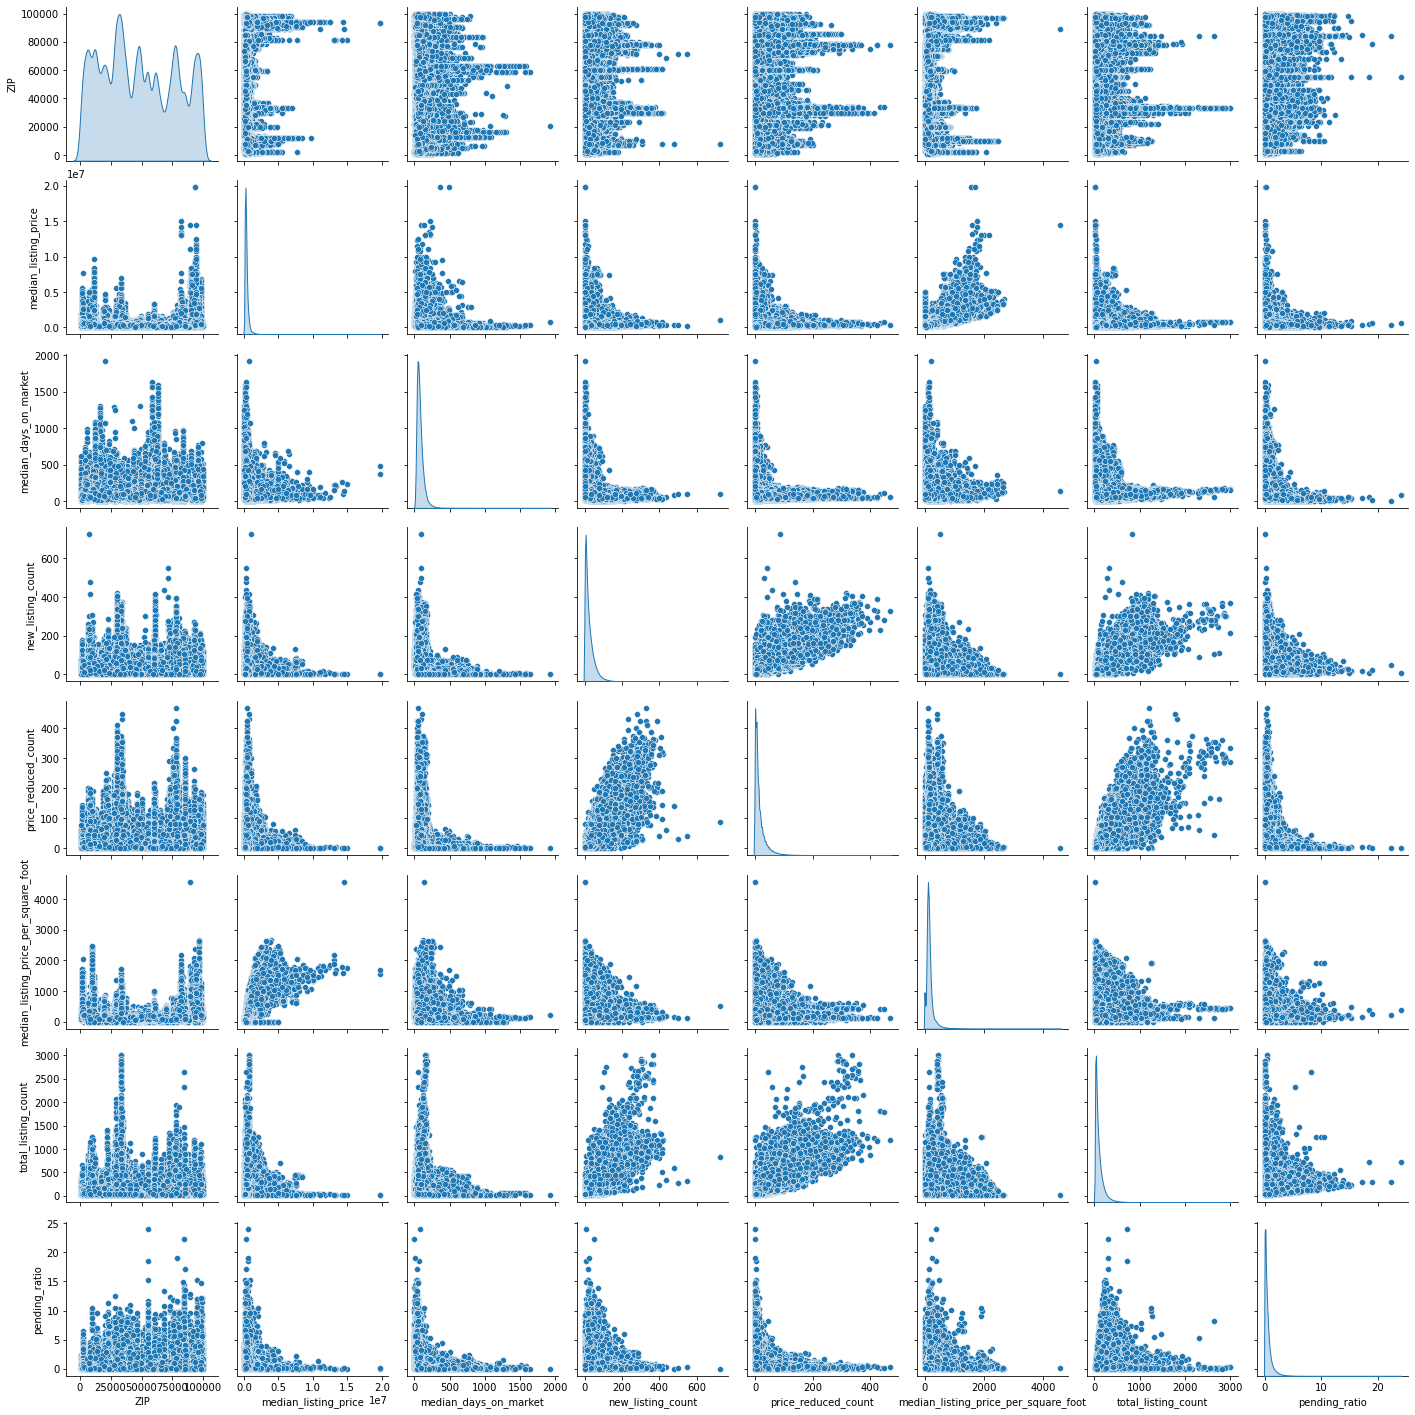

In [106]:
# Análisis gráfico correlacional
sns.pairplot(train_dataset[['ZIP', 'median_listing_price', 'median_days_on_market', 'new_listing_count','price_reduced_count',
                            'median_listing_price_per_square_foot','total_listing_count','pending_ratio']], diag_kind='kde')

In [61]:
# Training set and test set
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('median_days_on_market')
test_labels = test_features.pop('median_days_on_market')

In [37]:
## Reshape de matriz de caracteristicas de Pd a np para usar en Convolucional layer.

# x=train_features.values.reshape(639158,1,7)
# x.shape

(639158, 1, 7)

In [64]:
## Normalización 
normalizador = tf.keras.layers.Normalization(axis=-1)

In [65]:
## Normalización adaptada a np
normalizador.adapt(np.array(train_features))

In [66]:
print(normalizador.mean.numpy())

[[4.7798359e+04 3.5925762e+05 2.4463184e+01 1.5730403e+01 1.6257111e+02
  1.0337784e+02 5.0163120e-01]]


In [67]:
# Llamada de la primera capa
Primera = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Primer ejemplo:', Primera)
  print()
  print('Normalizado:', normalizador(Primera).numpy())

Primer ejemplo: [[ 46250.   480000.       20.       12.      123.45     58.        1.23]]

Normalizado: [[-0.05  0.31 -0.16 -0.16 -0.25 -0.38  1.02]]


In [52]:
## 4.1 REDES CONVOLUCIONALES 

input_shape = (1,1,7)

def build_and_compile_model(norm):
  conv_model = tf.keras.Sequential([
#       tf.keras.layers.Dense(units=3, activation='relu'),
      tf.keras.layers.Conv1D(filters=3,
                             kernel_size=(2,),
                             activation='relu',
                             input_shape=input_shape[1:])(x),
      tf.keras.layers.MaxPooling1D(2,2),
#       tf.keras.layers.Dense(units=1)
      tf.keras.layers.Conv1D(3, 2, activation='relu',input_shape=input_shape[1:])(x)
 ])

  conv_model.compile(loss='mean_absolute_percentage_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return conv_model

In [98]:
Conv_model = build_and_compile_model(normalizador)
Conv_model.summary()

TypeError: The added layer must be an instance of class Layer. Received: layer=[] of type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [ ]:
## 4.2 REDES RECURRENTES




In [ ]:
# Comentarios
# Se encuentra que el modelo NO es compatible con la capa convolucional debido a que solo acepta redes densas dado que es un
# problema de regresión y no de clasificación.
# Así mismo sucede con la metodología de las Redes Recurrentes, ya que en el Dataset reultante después de la ingeniería de
# características no se utilizan fechas, ya que no ésta variable no es significativa para el problema en cuestión. La duración
# en que los propietarios tardan en vender su propiedad ya está registrada dentro de una de las 7 variables con las cuales
# se está ejecutando el modelo [Median days on Market].
# Se retoma reshape de matriz de caracteristica de np a pd.

In [71]:
## Regresión con Deep learning (Capas Densas)

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_percentage_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [72]:
dnn_model = build_and_compile_model(normalizador)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160
Trainable params: 145
Non-trainable params: 15
_________________________________________________________________


In [73]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.3,
    verbose=0, epochs=50)

CPU times: total: 33min 8s
Wall time: 24min 3s


In [74]:
# Progreso de modelo de entrenamiento
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
45,25.752241,25.795919,45
46,25.749783,25.775158,46
47,25.752337,25.776436,47
48,25.746666,25.772055,48
49,25.750069,25.779961,49


In [75]:
MAPE_test = hist['val_loss']
MAPE_test = np.mean(MAPE_test)
MAPE_test

25.87326549530029

In [76]:
test_results['Deep learning'] = MAPE_test

In [79]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([25.2, 27])
  plt.xlabel('Epoch')
  plt.ylabel('Error [median_days_on_market]')
  plt.legend()
  plt.grid(True)

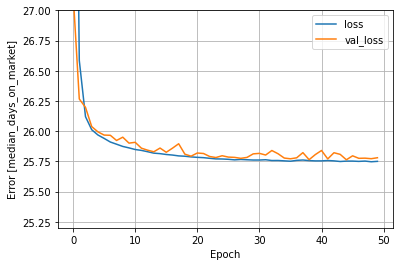

In [80]:
plot_loss(history)

In [ ]:
## A medida que se tengan menos neuronas, el error aumenta. Se evidencia que si el modelo se entrena con 3 neuronas,
# el porentaje de la función de perdida aumenta a un promedio de 28,9. 

In [81]:
test_results_dnn_model = dnn_model.evaluate(test_features, test_labels, verbose=0)
print (test_results_dnn_model)

27940.1328125


8561/8561 [==============================] - 13s 1ms/step


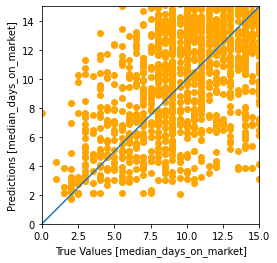

In [82]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions, color = 'orange')
plt.xlabel('True Values [median_days_on_market]')
plt.ylabel('Predictions [median_days_on_market]')
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims) 
_ = plt.plot(lims, lims)

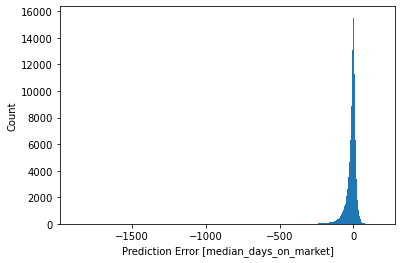

In [83]:
error = test_predictions - test_labels
plt.hist(error, bins=900)
plt.xlabel('Prediction Error [median_days_on_market]')
_ = plt.ylabel('Count')

In [84]:
# Performance de modelos aplicados en interfaz Python
pd.DataFrame(test_results, index=['MAPE [median_days_on_market]']).T

,MAPE [median_days_on_market]
Vecinos,0.308260
Random Forest,0.195666
Red Neuronal,1.823386
Deep learning,25.873265


In [ ]:
# Se evidencia que el mejor modelo en términos de score MAPE (dentro de la interfaz de Pyhton), lo presenta el Random Forest, 
# con un 19%. 